In [4]:
# Created: 20250103

In [1]:
import pyutil as pyu
pyu.get_local_pyinfo()

'conda env: ml312-2024; pyv: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:27:36) [GCC 11.2.0]'

In [2]:
print(pyu.ps2("requests"))

requests==2.32.3



[*********************100%***********************]  1 of 1 completed


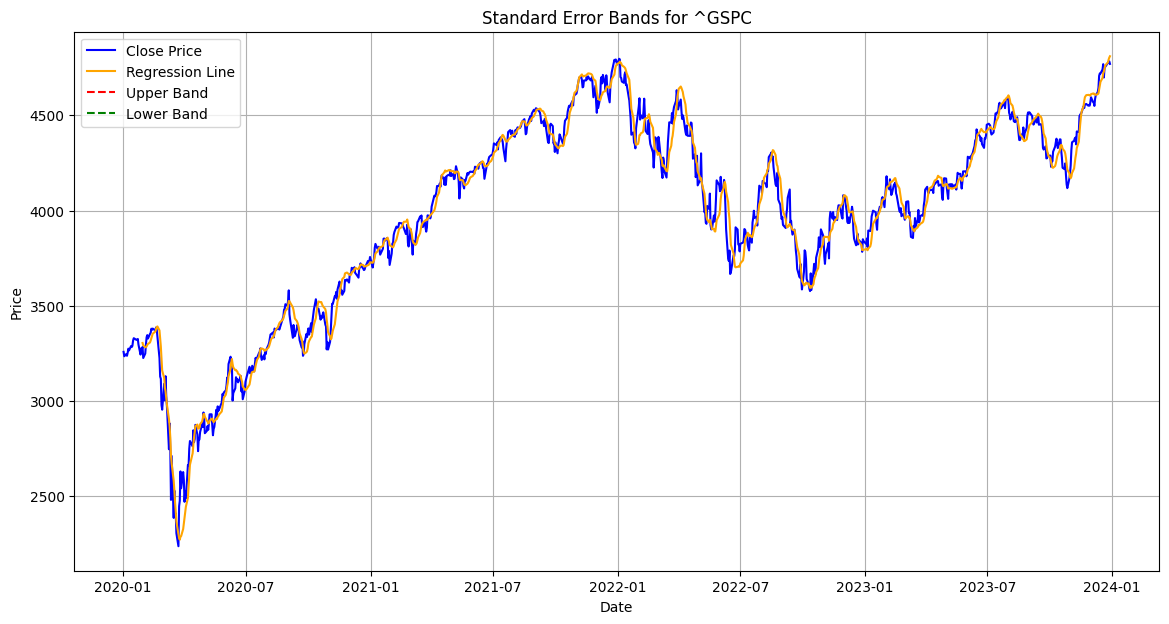

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Download historical data
symbol = "^GSPC"  # S&P 500 as an example
start = "2020-01-01"
end = "2023-12-31"
data = yf.download(symbol, start=start, end=end)

# Step 2: Calculate Standard Error Bands
def standard_error_bands(data, window=20, multiplier=2):
    # Initialize empty lists for regression, standard error, and bands
    reg_line = []
    std_err = []
    
    for i in range(len(data)):
        if i < window - 1:
            reg_line.append(np.nan)
            std_err.append(np.nan)
        else:
            y = data['Close'].iloc[i - window + 1:i + 1].values
            x = np.arange(len(y))
            # Perform linear regression
            coeffs = np.polyfit(x, y, 1)  # Fit a line (degree=1)
            reg = coeffs[0] * x + coeffs[1]
            reg_line.append(reg[-1])
            # Calculate standard error
            error = y - reg
            std_err.append(np.sqrt(np.mean(error ** 2)))
    
    # Add regression line and bands to the DataFrame
    data['Regression Line'] = reg_line
    data['Upper Band'] = data['Regression Line'] + (multiplier * pd.Series(std_err))
    data['Lower Band'] = data['Regression Line'] - (multiplier * pd.Series(std_err))
    
    return data

# Apply the function
data = standard_error_bands(data)

# Step 3: Plot Standard Error Bands
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['Regression Line'], label='Regression Line', color='orange', linestyle='-')
plt.plot(data['Upper Band'], label='Upper Band', color='red', linestyle='--')
plt.plot(data['Lower Band'], label='Lower Band', color='green', linestyle='--')
plt.fill_between(data.index, data['Lower Band'], data['Upper Band'], color='gray', alpha=0.2)
plt.title(f'Standard Error Bands for {symbol}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [7]:
def show_standard_error_bands(symbol):

    # Step 1: Download historical data
    start = "2020-01-01"
    end = "2023-12-31"
    data = yf.download(symbol, start=start, end=end)

    # Apply the function
    data = standard_error_bands(data)
    
    # Step 3: Plot Standard Error Bands
    plt.figure(figsize=(14, 7))
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.plot(data['Regression Line'], label='Regression Line', color='orange', linestyle='-')
    plt.plot(data['Upper Band'], label='Upper Band', color='red', linestyle='--')
    plt.plot(data['Lower Band'], label='Lower Band', color='green', linestyle='--')
    plt.fill_between(data.index, data['Lower Band'], data['Upper Band'], color='gray', alpha=0.2)
    plt.title(f'Standard Error Bands for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

[*********************100%***********************]  1 of 1 completed


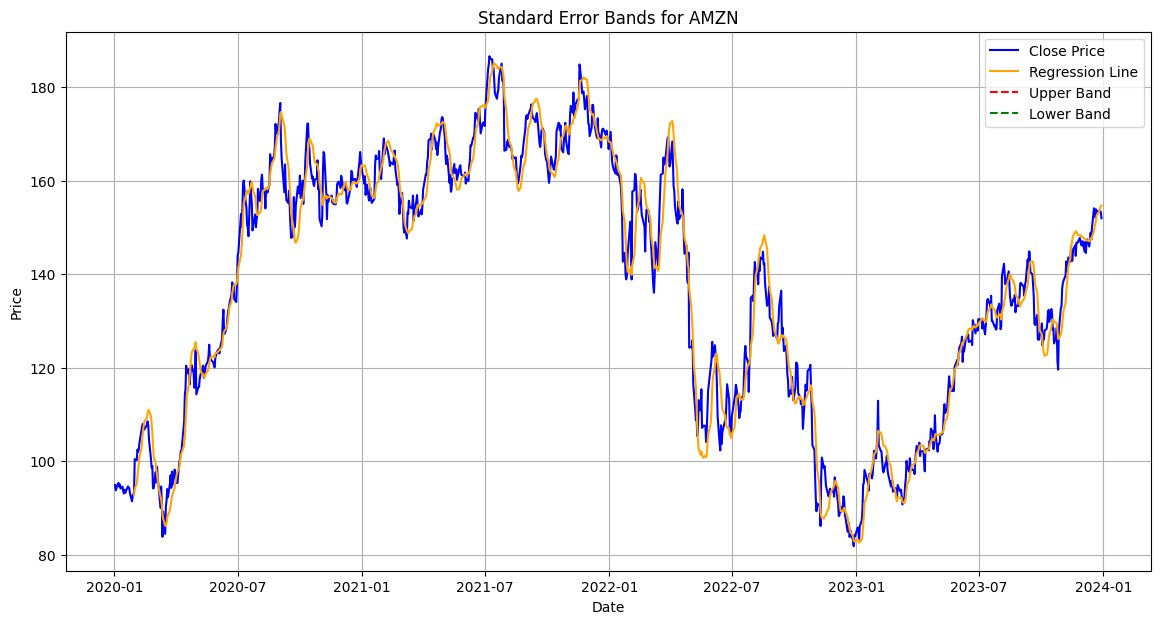

In [8]:
show_standard_error_bands("AMZN")